<a href="https://colab.research.google.com/github/bhavrish/CVD-Classifer/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [2]:
df = pd.read_csv('Cluster0')
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
1,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
2,6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
3,22,32,23046,1,158,90.0,145,85,2,2,0,0,1,1
4,24,35,16608,1,170,68.0,150,90,3,1,0,0,1,1


Lets Do Some Feature Engineering: blood_pressure = ap_hi / ap_lo https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/expert-answers/pulse-pressure/faq-20058189

In [3]:
df['blood_pressure'] = df["ap_hi"] / df["ap_lo"]
df.drop(["ap_hi", "ap_lo"], axis= 1)
df = df[df['blood_pressure'] != math.inf]

,Unnamed: 0,id,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,blood_pressure
0,1,1,20228,1,156,85.0,3,1,0,0,1,1,1.555556
1,2,2,18857,1,165,64.0,3,1,0,0,0,1,1.857143
2,6,9,22113,1,157,93.0,3,1,0,0,1,0,1.625000
3,22,32,23046,1,158,90.0,2,2,0,0,1,1,1.705882
4,24,35,16608,1,170,68.0,3,1,0,0,1,1,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6963,69976,99964,21699,1,163,65.0,2,2,0,0,1,0,1.500000
6964,69979,99969,22423,1,163,74.0,2,2,0,0,1,1,1.600000
6965,69991,99988,20609,1,159,72.0,2,2,0,0,1,0,1.444444
6966,69996,99995,22601,1,158,126.0,2,2,0,0,1,1,1.555556


In [5]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
    ('nonBinaryTransformer', StandardScaler(), ['age', 'height', 'weight', "blood_pressure", 'cholesterol', 'gluc'])
], remainder='passthrough')

scaled_features = ct.fit_transform(df)
print(scaled_features)

[[-0.23543807 -0.64091245  0.53476609 ...  0.          1.
   1.        ]
 [-0.9646783   0.6225903  -0.84239725 ...  0.          0.
   1.        ]
 [ 0.76720076 -0.50052326  1.05939974 ...  0.          1.
   0.        ]
 ...
 [-0.03278269 -0.21974487 -0.3177636  ...  0.          1.
   0.        ]
 [ 1.02676985 -0.36013406  3.22351354 ...  0.          1.
   1.        ]
 [-0.06948406  1.32453628 -0.3177636  ...  0.          1.
   0.        ]]


In [6]:
df_feat = df.drop("cardio", axis = 1)

In [7]:
df_feat.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,blood_pressure
0,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1.555556
1,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1.857143
2,6,9,22113,1,157,93.0,130,80,3,1,0,0,1,1.625000
3,22,32,23046,1,158,90.0,145,85,2,2,0,0,1,1.705882
4,24,35,16608,1,170,68.0,150,90,3,1,0,0,1,1.666667


In [8]:
df_targ = df.loc[:, "cardio"]
df_targ

0       1
1       1
2       0
3       1
4       1
       ..
6963    0
6964    1
6965    0
6966    1
6967    0
Name: cardio, Length: 6965, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_targ, test_size = .33, random_state = 44)

In [10]:
print(X_train, y_train)

      Unnamed: 0     id    age  gender  ...  smoke  alco  active  blood_pressure
1132       10956  15678  19817       1  ...      0     0       1        1.714286
6659       66929  95550  21877       1  ...      0     0       1        1.700000
4464       45154  64485  23403       1  ...      0     0       1        1.555556
1849       18570  26518  23136       1  ...      0     0       1        1.666667
6455       64945  92697  20403       1  ...      0     0       1        1.555556
...          ...    ...    ...     ...  ...    ...   ...     ...             ...
571         5523   7855  19692       1  ...      0     0       1        1.750000
1197       11665  16668  20558       1  ...      0     0       1        1.600000
2803       28161  40257  19002       1  ...      0     0       1        1.444444
3493       35229  50327  19061       1  ...      0     0       1        1.375000
5911       59432  84857  17632       1  ...      0     0       1        1.555556

[4666 rows x 14 columns] 11

In [11]:
group = [1, 3, 5, 7, 9, 11, 13, 15, 17,19,21, 23, 25, 27, 29, 31]
error = []

for i in group:
  neigh = KNeighborsClassifier(n_neighbors = i, metric= "manhattan", weights= "uniform")
  neigh.fit(X_train, y_train)  
  print(neigh.score(X_test, y_test))
  error.append(neigh.score(X_test, y_test))
  

0.6124401913875598
0.6489778164419313
0.6668116572422792
0.6781209221400609
0.6837755545889517
0.6942148760330579
0.6963897346672466
0.7050891692040018
0.7033492822966507
0.7016093953892997
0.706394084384515
0.7081339712918661
0.7107438016528925
0.7142235754675946
0.7133536320139191
0.7155284906481079


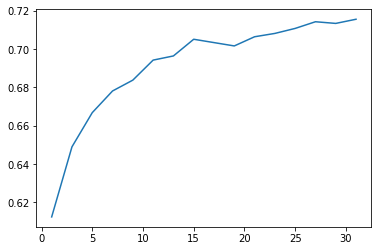

In [12]:
plt.plot(group, error) ## this is accuracy

In [64]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    "n_neighbors" : [1, 3, 5, 7, 9, 11, 13, 15, 17,19,21, 23, 25, 27, 29, 31],
    "metric" : ["euclidean", "manhattan"]
}


In [14]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose= 1, cv =3, n_jobs= -1)


In [70]:
gs_results = gs.fit(X_train, y_train)
predict = gs.predict(X_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [59]:
predict = gs.predict(X_test)

In [17]:
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'}

In [20]:
print("Accuracy:", metrics.accuracy_score(y_test, predict))
#print(classification_report(y_test, grid_predictions))

Accuracy: 0.7133536320139191


Try cross validation!


In [26]:
kn = KNeighborsClassifier(n_neighbors=29, metric= "manhattan")
scores = cross_validate(kn, df_feat, df_targ, cv = 5, return_train_score= True, return_estimator= True)
scores

{'estimator': [KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29)],
 'fit_time': array([0.01733804, 0.01160431, 0.01260781, 0.01140022, 0.01129937]),
 'score_time': array([0.05701661, 0.06062222, 0.05807972, 0.05876899, 0.05579352]),
 'test_score': array([0.30007179, 0.71356784, 0.71356784, 0.68485284, 0.66475233]),
 'train_score': array([0.71823403, 0.71482412, 0.71500359, 0.71392678, 0.71500359])}

Cross Validation on another cluster

In [39]:
df1 = pd.read_csv("Cluster1")
df1.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
1,25,36,14453,1,153,65.0,130,100,2,1,0,0,1,0
2,27,38,18085,1,159,78.0,120,80,1,1,0,0,1,0
3,32,44,14605,1,159,60.0,110,70,1,1,0,0,1,0
4,37,51,17976,1,164,70.0,130,90,1,1,0,0,1,0


In [40]:
df1['blood_pressure'] = df1["ap_hi"] / df1["ap_lo"]
df1.drop(["ap_hi", "ap_lo"], axis= 1)
df1 = df1[df1['blood_pressure'] != math.inf]
df1.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,blood_pressure
0,8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,1.571429
1,25,36,14453,1,153,65.0,130,100,2,1,0,0,1,0,1.300000
2,27,38,18085,1,159,78.0,120,80,1,1,0,0,1,0,1.500000
3,32,44,14605,1,159,60.0,110,70,1,1,0,0,1,0,1.571429
4,37,51,17976,1,164,70.0,130,90,1,1,0,0,1,0,1.444444


In [41]:
df1_targ = df1.loc[:, "cardio"]
df1_targ.head()

0    0
1    0
2    0
3    0
4    0
Name: cardio, dtype: int64

In [42]:
df1_feat = df1.drop("cardio", axis = 1)
df1_feat.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,blood_pressure
0,8,13,17668,1,158,71.0,110,70,1,1,0,0,1,1.571429
1,25,36,14453,1,153,65.0,130,100,2,1,0,0,1,1.300000
2,27,38,18085,1,159,78.0,120,80,1,1,0,0,1,1.500000
3,32,44,14605,1,159,60.0,110,70,1,1,0,0,1,1.571429
4,37,51,17976,1,164,70.0,130,90,1,1,0,0,1,1.444444


In [49]:
kn = KNeighborsClassifier(n_neighbors=29, metric= "manhattan")
scores = cross_validate(kn, df1_feat, df1_targ, cv = 5, return_train_score= True, return_estimator= True)
scores

{'estimator': [KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29)],
 'fit_time': array([0.02058721, 0.01949692, 0.01935291, 0.0187757 , 0.01846623]),
 'score_time': array([0.09503174, 0.09881568, 0.09574556, 0.1092658 , 0.10028195]),
 'test_score': array([0.30662625, 0.58510178, 0.48679082, 0.52576873, 0.69584055]),
 'train_score': array([0.70200325, 0.70070384, 0.70124526, 0.70059556, 0.69965353])}

In [47]:
kn = KNeighborsClassifier(n_neighbors=29, metric= "manhattan")
scores = cross_validate(kn, df1_feat, df1_targ, cv = 5, scoring = "f1", return_train_score= True, return_estimator= True)
scores

{'estimator': [KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29),
  KNeighborsClassifier(metric='manhattan', n_neighbors=29)],
 'fit_time': array([0.02204943, 0.01861167, 0.01957846, 0.01944184, 0.01897526]),
 'score_time': array([0.10040855, 0.09864354, 0.11419654, 0.10176086, 0.0933919 ]),
 'test_score': array([0.4672213 , 0.36048064, 0.35702659, 0.35091879, 0.        ]),
 'train_score': array([0.07959866, 0.08111702, 0.07571189, 0.07245891, 0.07471648])}

Find Accuracy for all clusters

In [63]:
grid_params

{'metric': ['euclidean', 'manhattan'],
 'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
 'weights': ['uniform', 'distance']}

In [69]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose= 1, cv =3, n_jobs= -1)
gs.best_params_

AttributeError: ignored

In [71]:
Clusters = ["Cluster0", "Cluster1", "Cluster2", "Cluster3", "Cluster4", "Cluster5", "Cluster6", "Cluster7", 'Cluster8']
knx = KNeighborsClassifier(n_neighbors=29, metric= "manhattan")
error = {}
for clust in Clusters:
  df = pd.read_csv(clust)
  df['blood_pressure'] = df["ap_hi"] / df["ap_lo"]
  df.drop(["ap_hi", "ap_lo"], axis= 1)
  df = df[df['blood_pressure'] != math.inf]
  df_targ = df.loc[:, "cardio"]
  df_feat = df.drop("cardio", axis = 1)
  X_train, X_test, y_train, y_test = train_test_split(df_feat, df_targ, test_size = .33, random_state = 44)
  gs = GridSearchCV(knx, grid_params, verbose= 1, cv =3, n_jobs= -1)
  gs.fit(X_train, y_train)
  knx = KNeighborsClassifier(n_neighbors= gs.best_params_['n_neighbors'], metric= gs.best_params_['metric'])
  knx.fit(X_train, y_train)
  error[clust] = knx.score(X_test, y_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [72]:
error

{'Cluster0': 0.7133536320139191,
 'Cluster1': 0.699475065616798,
 'Cluster2': 0.5563798219584569,
 'Cluster3': 0.6213942307692307,
 'Cluster4': 0.8534201954397395,
 'Cluster5': 0.5615763546798029,
 'Cluster6': 0.5529793069060085,
 'Cluster7': 0.5812973883740522,
 'Cluster8': 0.5367903258864521}